In [2]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [14]:
df = pd.read_csv('CollegeRookieStatLog2.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,SF,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,PF,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,SG,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,SF,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,PG,20,2.8,3.7,1.5,0.2,10.9


In [15]:
dfend = pd.read_csv('2019DraftClass.csv')
dfend.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [18]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
for col in cols_at_end:
    dfend[col] = 0
print(len(df))
print(len(dfend))

860
117


In [21]:
df1 = df.append(dfend, ignore_index = True)
df1.tail()

,2P,2P%,2PA,3P,3P%,3PA,AST,Age,BLK,DRB,...,ORB,PF,PTS,Pos,SOS,STL,School,TOV,TRB,Year
972,3.6,0.509,7.1,1.9,0.343,5.5,1.7,NaN,0.5,3.6,...,1.2,2.3,15.5,NaN,6.82,0.7,UCLA,1.6,4.8,NaN
973,2.6,0.633,4.1,0.0,0.167,0.2,0.4,NaN,0.6,2.8,...,2.6,1.9,7.0,NaN,9.15,0.3,LSU,1.1,5.4,NaN
974,5.0,0.540,9.2,0.3,0.291,1.0,2.1,NaN,1.5,4.0,...,2.5,3.2,15.7,NaN,10.15,0.9,Tennessee,2.1,6.5,NaN
975,8.2,0.747,11.0,0.7,0.338,2.2,2.1,NaN,1.8,5.4,...,3.5,2.1,22.6,NaN,11.97,2.1,Duke,2.4,8.9,NaN
976,2.6,0.639,4.1,0.0,0.000,0.0,0.5,NaN,2.4,3.3,...,1.4,2.6,6.4,NaN,5.49,0.5,Oregon,1.1,4.7,NaN


In [24]:
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,PTS,SOS,Year,Pos,Age,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,3.2,-5.93,1990,0,22,0.4,0.3,0.2,0.2,1.3
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,14.6,0.74,1996,1,24,5.6,0.6,0.4,0.2,6.3
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.9,-7.38,1998,2,22,0.7,0.0,0.1,0.1,2.7
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,5.2,-7.20,2000,0,23,2.7,0.5,0.7,0.4,7.0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,15.8,11.13,2002,3,20,2.8,3.7,1.5,0.2,10.9


In [25]:
df['Fouls'] = df['PF']
df = df.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df['Pos'])
df1 = pd.concat([df, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,Fouls,C,C-PF,PF,PG,PG-SG,SF,SF-PF,SG,SG-PG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,1.0,0,0,0,0,0,1,0,0,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,3.3,0,0,1,0,0,0,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,2.4,0,0,0,0,0,0,0,1,0
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,1.4,0,0,0,0,0,1,0,0,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,2.4,0,0,0,1,0,0,0,0,0


In [26]:
df1['C'] = df1['C'] + df1['C-PF']
df1['PG'] = df1['PG'] + df1['PG-SG']
df1['SF'] = df1['SF'] + df1['SF-PF']
df1['SG'] = df1['SG'] + df1['SG-PG']
df1 = df1.drop(['C-PF','PG-SG','SF-PF','SG-PG'], axis=1)
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,Navy,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,Southern Illinois,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,Maryland-Eastern Shore,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,Lamar,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,Arizona,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [27]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
0,Mike Higgins,0,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
1,Ashraf Amaya,1,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
2,James Cotton,2,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
3,Eddie Robinson,3,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
4,Gilbert Arenas,4,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [28]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,NBAAST,NBASTL,NBABLK,NBAPTS,Fouls,C,PF,PG,SF,SG
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0.3,0.2,0.2,1.3,1.0,0,0,0,1,0
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0.6,0.4,0.2,6.3,3.3,0,1,0,0,0
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0.0,0.1,0.1,2.7,2.4,0,0,0,0,1
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0.5,0.7,0.4,7.0,1.4,0,0,0,1,0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,3.7,1.5,0.2,10.9,2.4,0,0,1,0,0


In [29]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,60.0,2.0,9.0,1.1,2.3,0.464,0.9,1.7,0.510,0.2,...,0,0,0,1,0,0.4,0.3,0.2,0.2,1.3
Ashraf Amaya,128.0,120.0,32.2,5.3,9.4,0.567,5.2,9.0,0.581,0.1,...,0,1,0,0,0,5.6,0.6,0.4,0.2,6.3
James Cotton,19.0,3.0,13.9,0.8,1.8,0.441,0.8,1.7,0.469,0.0,...,0,0,0,0,1,0.7,0.0,0.1,0.1,2.7
Eddie Robinson,114.0,75.0,32.6,1.8,4.9,0.365,1.5,3.8,0.403,0.3,...,0,0,0,1,0,2.7,0.5,0.7,0.4,7.0
Gilbert Arenas,70.0,33.0,30.5,5.6,12.1,0.466,4.1,7.9,0.523,1.5,...,0,0,1,0,0,2.8,3.7,1.5,0.2,10.9


In [127]:
df1.columns

Index(['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PTS', 'SOS', 'Year', 'Age', 'Fouls', 'C', 'PF', 'PG', 'SF',
       'SG', 'NBATRB', 'NBAAST', 'NBASTL', 'NBABLK', 'NBAPTS'],
      dtype='object')

In [128]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [129]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [130]:
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.956176,-2.017407,-3.637652,-2.492531,-2.457722,-0.150785,-1.966766,-2.103130,-0.023175,-1.021276,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,-1.096073,-0.668816,-0.712963,-0.166488,-0.958758
Ashraf Amaya,0.909533,1.444143,0.808793,0.684931,0.006659,1.686432,1.394652,0.988651,1.350695,-1.152836,...,-0.346109,1.930097,-0.555860,-0.463346,-0.606011,1.909776,-0.432375,-0.169151,-0.166488,0.347286
James Cotton,-2.081088,-1.988072,-2.698532,-2.719492,-2.631270,-0.561038,-2.044938,-2.103130,-0.816537,-1.284397,...,-0.346109,-0.518109,-0.555860,-0.463346,1.650134,-0.922658,-0.905257,-0.984869,-0.502591,-0.593066
Eddie Robinson,0.525416,0.124061,0.885456,-1.962954,-1.555273,-1.916655,-1.497731,-1.213713,-2.093656,-0.889715,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,0.233437,-0.511189,0.646567,0.505717,0.530133
Gilbert Arenas,-0.681807,-1.108017,0.482976,0.911893,0.943819,-0.115111,0.534755,0.522766,0.228378,0.689009,...,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,0.291242,2.010848,2.821814,-0.166488,1.548847


In [131]:
df3 = df1[0:866]


In [132]:
df3.tail()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Julian Washburn,0.964407,1.620155,1.192107,0.155354,0.388465,-0.668060,0.143892,0.480413,-0.835887,-0.100353,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,0.002218,-0.274748,0.646567,-0.502591,-0.723670
Yuta Watanabe,1.074154,1.062786,0.406313,-0.449877,-0.166889,-0.846431,-0.637833,-0.493710,-0.584334,0.294328,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,-0.113391,-0.511189,-0.441057,-0.502591,-0.619187
Thomas Welsh,1.019280,0.681429,-0.571138,-0.298569,-0.652823,1.151320,0.222064,-0.027825,0.828237,-0.889715,...,2.889260,-0.518109,-0.555860,-0.463346,-0.606011,-1.096073,-0.511189,-1.256774,-0.838693,-0.880395
Kenrich Williams,0.196174,0.417412,0.808793,-0.222915,-0.340437,0.205956,-0.246971,-0.366650,0.421881,0.031207,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,1.447338,0.513388,1.462285,0.505717,0.295045
Trae Young,-1.724408,-1.137352,1.422096,2.878893,3.442910,-0.899942,0.847445,1.031004,-0.352130,3.583338,...,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,0.811485,5.478648,1.190379,-0.166488,3.690760


In [133]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [134]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [135]:
test_y.tail()

,Age,Fouls,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,
Julian Washburn,2.603337,-0.792484,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,0.002218,-0.274748,0.646567,-0.502591,-0.723670
Yuta Watanabe,0.975857,-0.792484,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,-0.113391,-0.511189,-0.441057,-0.502591,-0.619187
Thomas Welsh,-0.109129,0.627383,2.889260,-0.518109,-0.555860,-0.463346,-0.606011,-1.096073,-0.511189,-1.256774,-0.838693,-0.880395
Kenrich Williams,0.975857,0.627383,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,1.447338,0.513388,1.462285,0.505717,0.295045
Trae Young,-1.194116,-0.792484,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,0.811485,5.478648,1.190379,-0.166488,3.690760


In [136]:
test_y = test_y.drop(['Age','Fouls','C','PF','PG','SF','SG'],axis=1)

In [137]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Julian Washburn,0.002218,-0.274748,0.646567,-0.502591,-0.723670
Yuta Watanabe,-0.113391,-0.511189,-0.441057,-0.502591,-0.619187
Thomas Welsh,-1.096073,-0.511189,-1.256774,-0.838693,-0.880395
Kenrich Williams,1.447338,0.513388,1.462285,0.505717,0.295045
Trae Young,0.811485,5.478648,1.190379,-0.166488,3.690760


In [138]:
# Correlation Matrix

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.133851;0.62x0.737297)


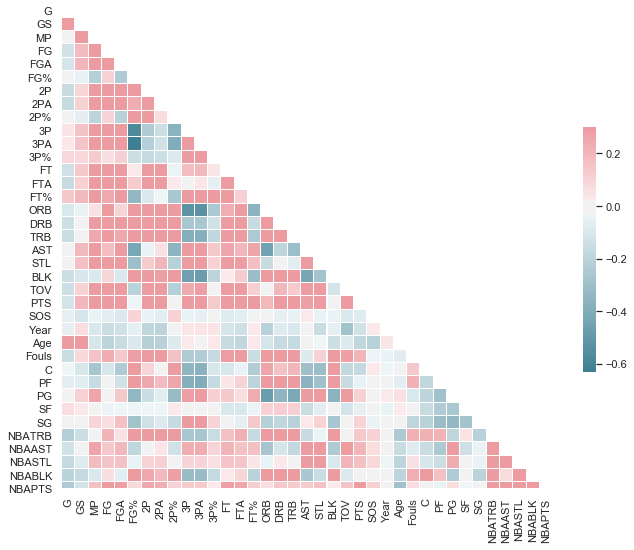

In [140]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [141]:
# Feature Selection

In [142]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 12)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[ True False  True False  True False  True  True False False  True False
 False False False False False False  True  True  True  True  True  True
 False]
[ 1 12  1  5  1  8  1  1  2  4  1 11 10  3  6  9 14  7  1  1  1  1  1  1
 13]


In [143]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,25):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,G,MP,FGA,2P,2PA,3PA,AST,STL,BLK,TOV,PTS,SOS
Name,,,,,,,,,,,,
Mike Higgins,-0.956176,-3.637652,-2.457722,-1.966766,-2.103130,-1.075227,-1.369597,-1.753733,-0.734653,-1.858841,-2.411521,-3.137543
Ashraf Amaya,0.909533,0.808793,0.006659,1.394652,0.988651,-1.176853,-1.104807,0.060474,0.705187,-0.188700,0.529717,-1.414695
James Cotton,-2.081088,-2.698532,-2.631270,-2.044938,-2.103130,-1.329292,-1.237202,-0.947419,-0.590669,-1.580484,-2.488922,-3.512075
Eddie Robinson,0.525416,0.885456,-1.555273,-1.497731,-1.213713,-0.821162,0.748725,-0.544262,-0.734653,1.203084,-1.895515,-3.465582
Gilbert Arenas,-0.681807,0.482976,0.943819,0.534755,0.522766,0.754042,-0.045646,1.673101,-0.734653,0.924727,0.839321,1.269021


In [144]:
# Linear Regression

In [145]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-0.19524592, -0.31894311, -2.85548423,  0.33108853,  1.93540077,
        1.88576058,  0.27879794,  0.11342102,  0.09755448, -0.16659025,
        0.62378715,  0.10101309])

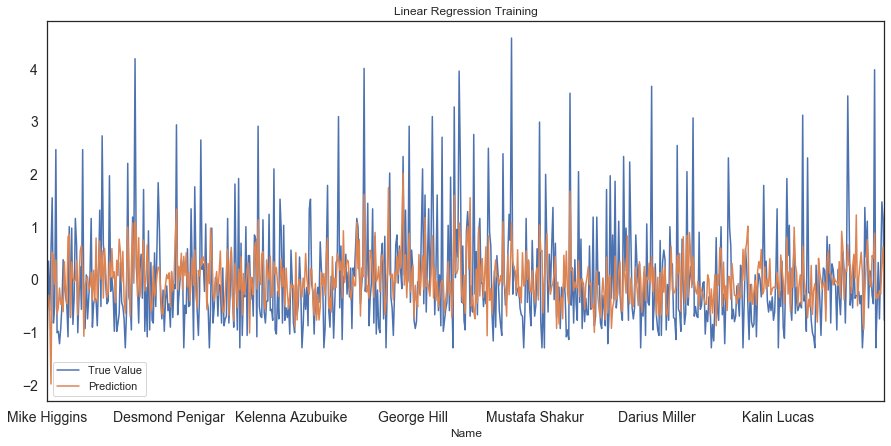

adj train r^2 = 0.20451420546858512
train mse = 0.7740404229711519


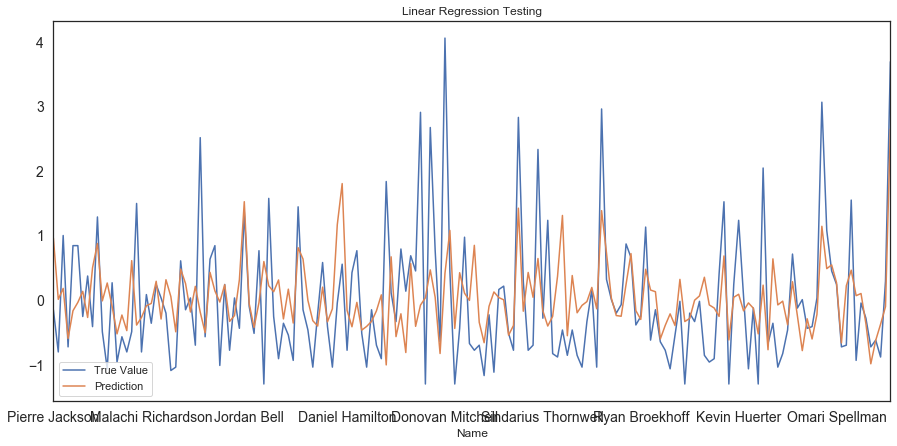

['G', 'MP', 'FGA', '2P', '2PA', '3PA', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.20489229415586774
test mse = 0.8112193764562965


In [146]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [147]:
# Extra Trees

In [148]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=1000,
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

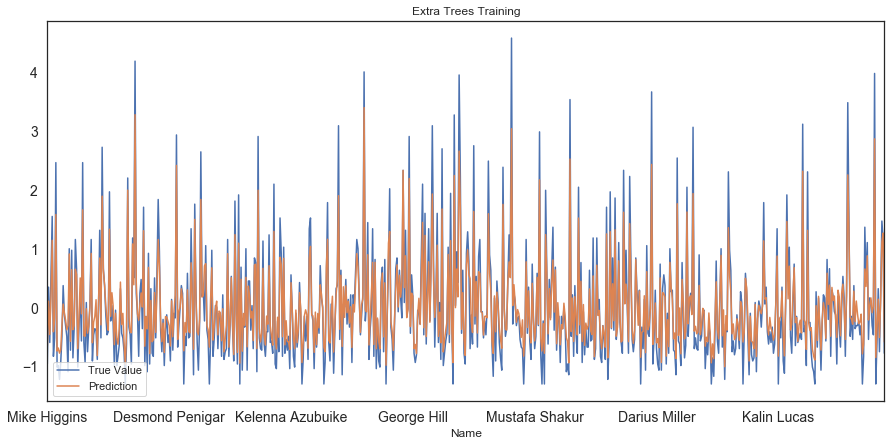

adj train r^2 = 0.878720933001977
train mse = 0.11800952444662322


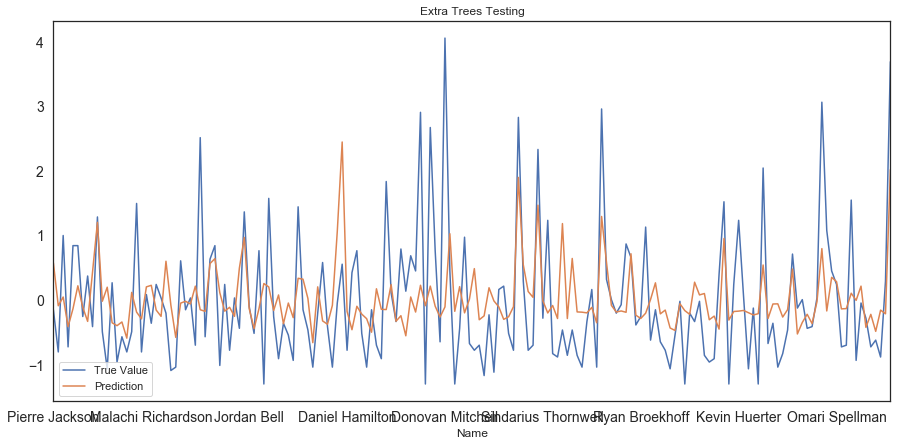

['G', 'MP', 'FGA', '2P', '2PA', '3PA', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.20500972386716854
test mse = 0.8110995672072115


In [149]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))


In [150]:
# Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

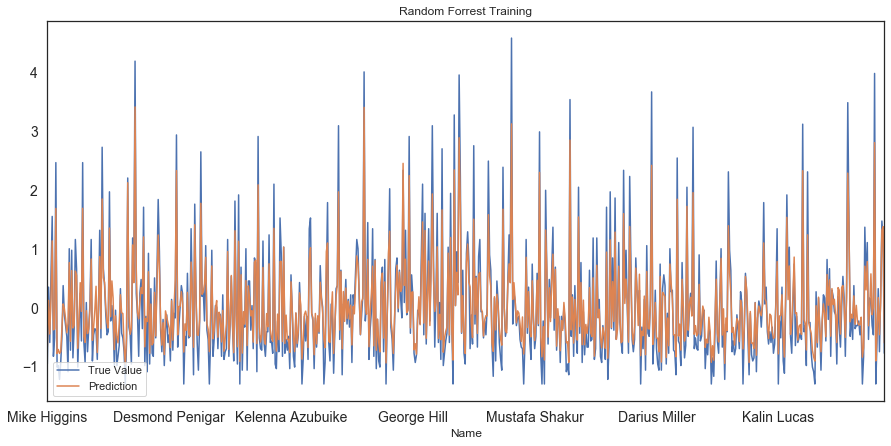

adj train r^2 = 0.8796908723537733
train mse = 0.11706573353133336


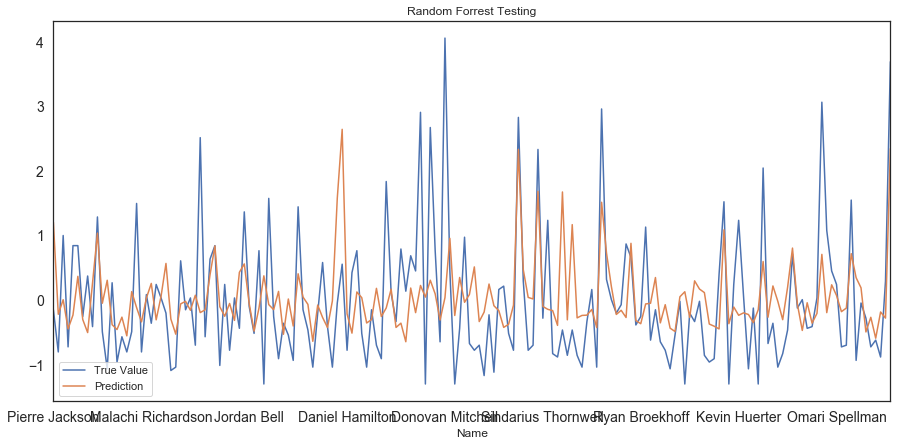

['G', 'MP', 'FGA', '2P', '2PA', '3PA', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS']
adj test r^2 = 0.1882550680475361
test mse = 0.8281937311133609


In [152]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [153]:
# XGBoost

In [154]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [156]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.values)

[04:14:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

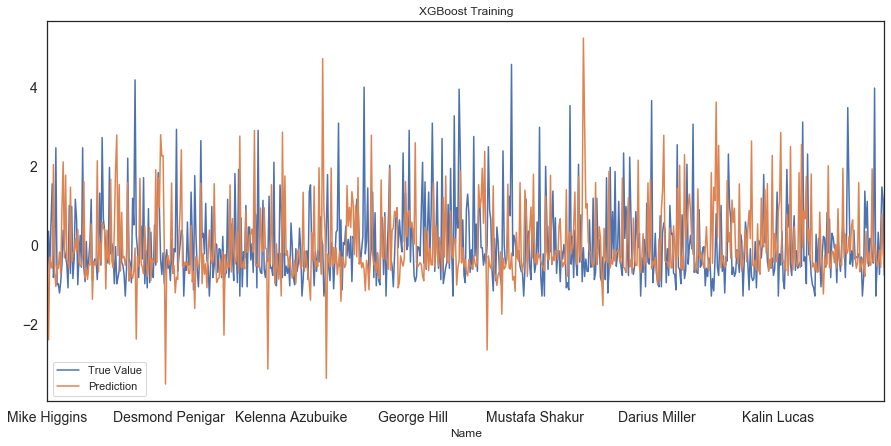

adj train r^2 = -1.051895759845344
train mse = 1.9965790373151422


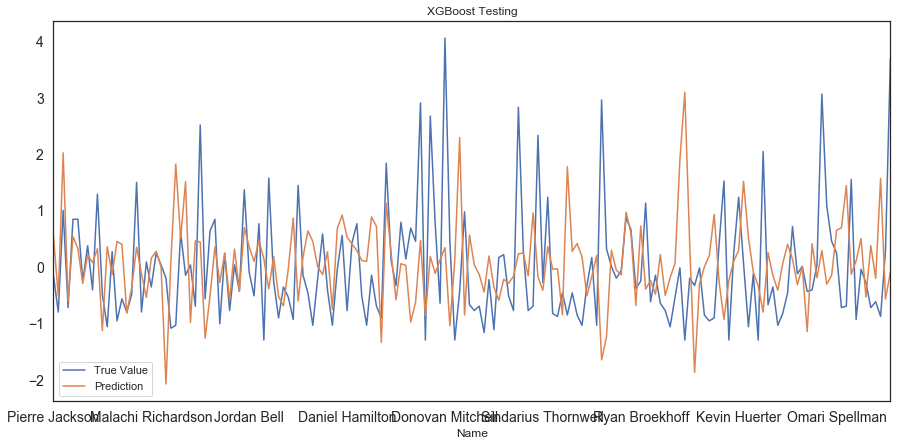

['G', 'MP', 'FGA', '2P', '2PA', '3PA', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS']
adj test r^2 = -0.581491256872799
test mse = 1.6135378161244172


In [157]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [158]:
# Feed Forward Neural Network

In [159]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [160]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
#model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.NBAPTS.values.ravel(), validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500,verbose=0,shuffle=False, callbacks=[early_stop])

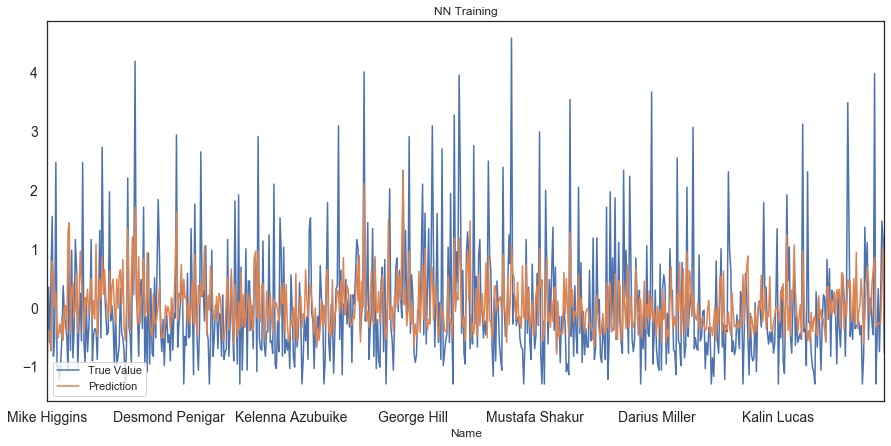

adj train r^2 = 0.22471337270729275
train mse = 0.7543858017816885


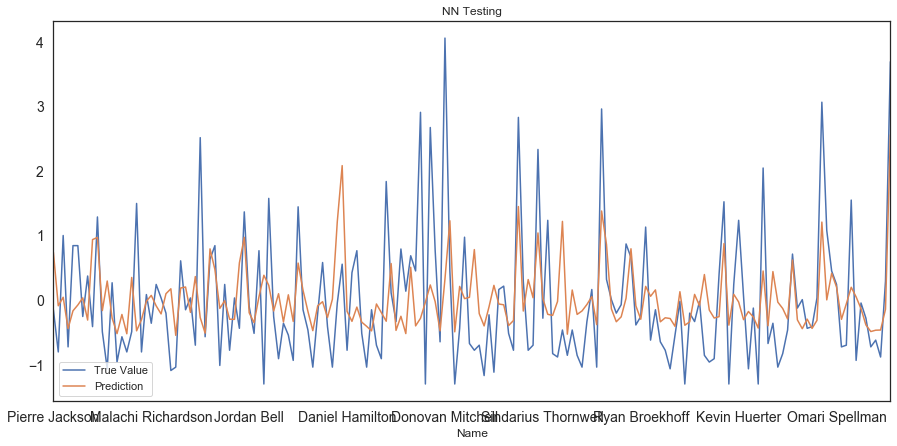

adj test r^2 = 0.2231459981856233
test mse = 0.7925957883660322


In [161]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [162]:
# LSTM

In [163]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [164]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

Restoring model weights from the end of the best epoch
Epoch 00013: early stopping


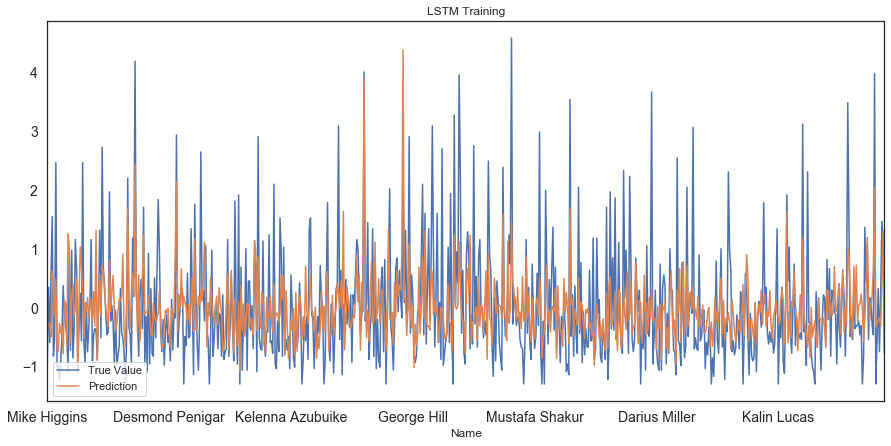

adj train r^2 = 0.301250899486764
train mse = 0.6799116376811903


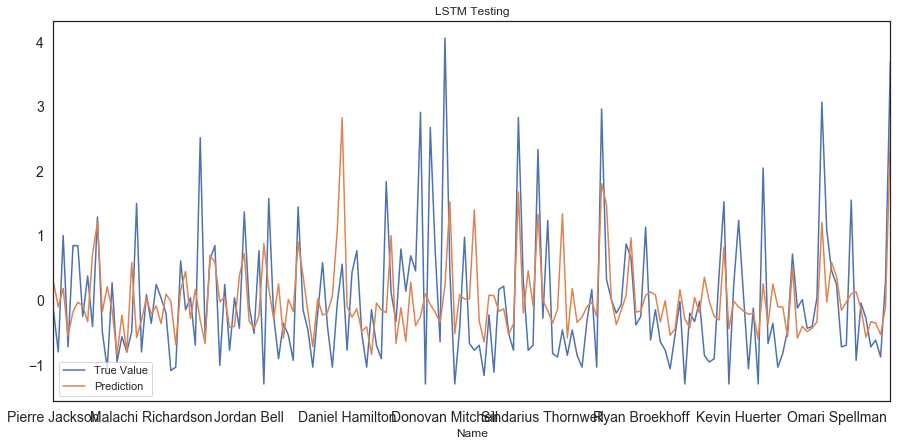

adj test r^2 = 0.16899048449619658
test mse = 0.8478486826895333


In [165]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [166]:
# TPOT

In [167]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=.5, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


0.5023668166666667 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(PCA(MaxAbsScaler(DecisionTreeRegressor(StandardScaler(DecisionTreeRegressor(MinMaxScaler(input_matrix), max_depth=1, min_samples_leaf=2, min_samples_split=4)), max_depth=1, min_samples_leaf=7, min_samples_split=19)), iterated_power=4, svd_solver=randomized), C=5.0, dual=False, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.01)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=1000000,
              max_eval_time_mins=5, max_time_mins=0.5, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=5,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=1, warm_start=False)

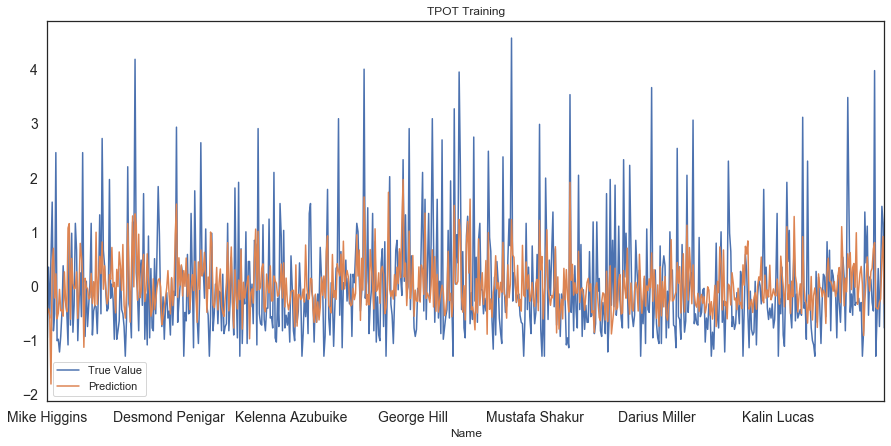

adj train r^2 = 0.21508465852068692
train mse = 0.7637549370357744


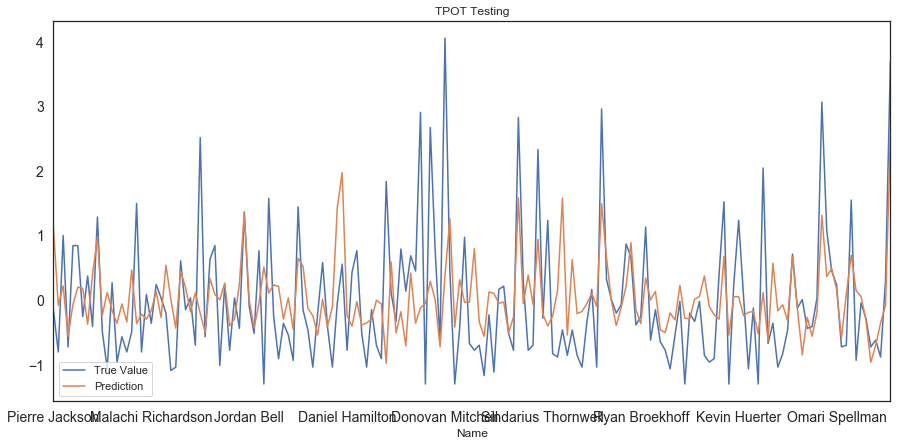

adj test r^2 = 0.2063621117813469
test mse = 0.8097197751709839


In [168]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

In [170]:
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction
Name,,,,,,
Pierre Jackson,-0.691439,0.986270,-0.441057,-0.838693,-0.149011,1.131634
Damian Jones,0.002218,-0.905257,-0.984869,0.505717,-0.802033,-0.081054
Skal Labissiere,1.505142,-0.274748,0.102755,0.505717,1.000309,0.220417
Jake Layman,-0.922658,-0.668816,-0.441057,-0.502591,-0.723670,-0.561306
Caris LeVert,0.580266,0.592202,1.190379,-0.502591,0.843583,-0.066202


In [171]:
# Differences

In [172]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Derrick White,-0.460220,-0.511189,-0.712963,-0.166488,-0.462461,1.578320,-2.040781
Chris Boucher,-0.749244,-0.905257,-1.256774,-0.838693,-1.298330,0.514898,-1.813228
Justin Patton,-1.327292,-0.905257,1.462285,-0.838693,-0.775912,0.796207,-1.572119
Jawun Evans,-0.286806,0.749829,0.918473,-0.502591,-0.044527,1.429294,-1.473821
Markelle Fultz,0.464656,2.089661,1.190379,0.169615,0.556253,1.973209,-1.416956


In [173]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,chip
Name,,,,,,,
Donovan Mitchell,0.811485,2.010848,2.821814,0.169615,4.056453,0.378178,3.678275
Kyle Kuzma,2.314409,0.513388,0.374661,0.505717,2.907134,-0.115717,3.022851
Andre Ingram,0.406852,1.853220,2.821814,4.202845,1.836177,-0.977015,2.813192
Nikola Vucevic,4.684405,1.301525,1.462285,2.522333,2.515320,-0.205853,2.721174
Lauri Markkanen,3.008067,0.040507,0.374661,1.177922,2.672046,0.293092,2.378954


In [174]:
# 2019 Predictions

In [175]:
train=df3
test=df4
trains = np.split(train, [25], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [25], axis=1)
test_x=tests[0]
test_y=tests[1]

In [177]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = ExtraTreesRegressor(n_estimators=100,bootstrap=True)
    rfe = RFE(model, 12)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df1.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,25):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation='linear',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=30, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

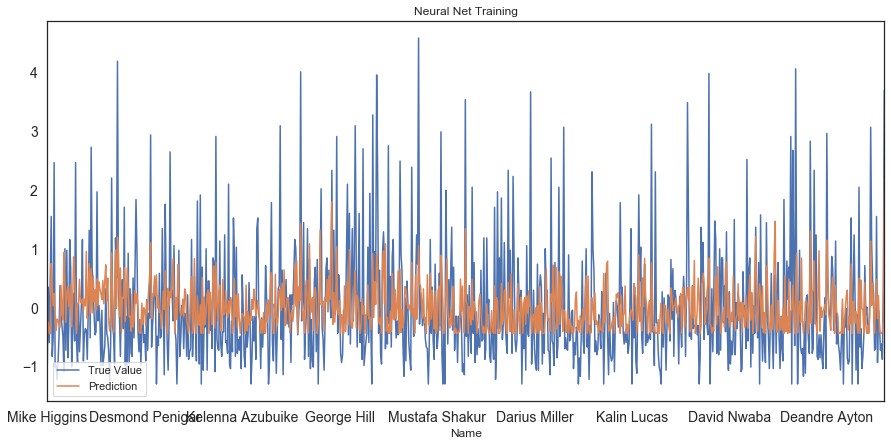

adj train r^2 = 0.19491816737551249
train mse = 0.7816510458775583


In [179]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

In [180]:
train_y2.head()

,Age,Fouls,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction
Name,,,,,,,,,,,,,
Mike Higgins,-0.109129,-2.415188,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,-1.096073,-0.668816,-0.712963,-0.166488,-0.958758,-0.437825
Ashraf Amaya,0.975857,2.250088,-0.346109,1.930097,-0.555860,-0.463346,-0.606011,1.909776,-0.432375,-0.169151,-0.166488,0.347286,-0.249909
James Cotton,-0.109129,0.424545,-0.346109,-0.518109,-0.555860,-0.463346,1.650134,-0.922658,-0.905257,-0.984869,-0.502591,-0.593066,-0.437830
Eddie Robinson,0.433364,-1.603836,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,0.233437,-0.511189,0.646567,0.505717,0.530133,-0.437857
Gilbert Arenas,-1.194116,0.424545,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,0.291242,2.010848,2.821814,-0.166488,1.548847,0.747414


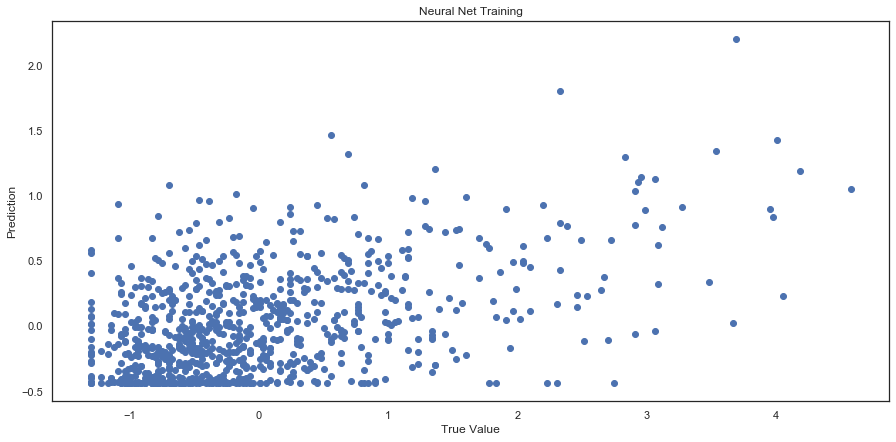

In [182]:
plt.figure(figsize=(15,7))
plt.scatter(train_y2['NBAPTS'],train_y2['prediction'])
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.title("Neural Net Training")
plt.show()

In [192]:
train

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,C,PF,PG,SF,SG,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Mike Higgins,-0.956176,-2.017407,-3.637652,-2.492531,-2.457722,-0.150785,-1.966766,-2.103130,-0.023175,-1.021276,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,-1.096073,-0.668816,-0.712963,-0.166488,-0.958758
Ashraf Amaya,0.909533,1.444143,0.808793,0.684931,0.006659,1.686432,1.394652,0.988651,1.350695,-1.152836,...,-0.346109,1.930097,-0.555860,-0.463346,-0.606011,1.909776,-0.432375,-0.169151,-0.166488,0.347286
James Cotton,-2.081088,-1.988072,-2.698532,-2.719492,-2.631270,-0.561038,-2.044938,-2.103130,-0.816537,-1.284397,...,-0.346109,-0.518109,-0.555860,-0.463346,1.650134,-0.922658,-0.905257,-0.984869,-0.502591,-0.593066
Eddie Robinson,0.525416,0.124061,0.885456,-1.962954,-1.555273,-1.916655,-1.497731,-1.213713,-2.093656,-0.889715,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,0.233437,-0.511189,0.646567,0.505717,0.530133
Gilbert Arenas,-0.681807,-1.108017,0.482976,0.911893,0.943819,-0.115111,0.534755,0.522766,0.228378,0.689009,...,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,0.291242,2.010848,2.821814,-0.166488,1.548847
Brandon Armstrong,-0.818991,-1.196022,0.463810,1.668432,1.985107,-0.596712,0.769272,1.200417,-0.855238,1.609932,...,-0.346109,-0.518109,-0.555860,-0.463346,1.650134,-1.038268,-0.747630,-0.712963,-0.838693,-0.828154
Carlos Arroyo,0.141300,-1.225358,1.383765,0.911893,1.117367,-0.489690,0.378409,0.353353,0.092926,0.952130,...,-0.346109,-0.518109,1.799015,-0.463346,-0.606011,-0.691439,0.592202,-0.441057,-0.838693,-0.514703
Shane Battier,1.403397,-0.932006,0.655467,0.079700,-0.166889,0.491349,-0.481488,-0.747829,1.137842,0.952130,...,-0.346109,-0.518109,-0.555860,2.158216,-0.606011,1.794166,1.301525,3.093720,2.522333,2.463078
Charlie Bell,1.238776,-1.108017,-0.187824,-0.525530,-0.305727,-0.596712,-0.481488,-0.324297,-0.584334,-0.100353,...,-0.346109,-0.518109,-0.555860,-0.463346,1.650134,-0.922658,-0.668816,-1.256774,-0.838693,-1.011000
